In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import imghdr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir='/content/drive/MyDrive/Final Dataset Pictures/JPEG images'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Final Dataset Pictures/JPEG images')

Found 526 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

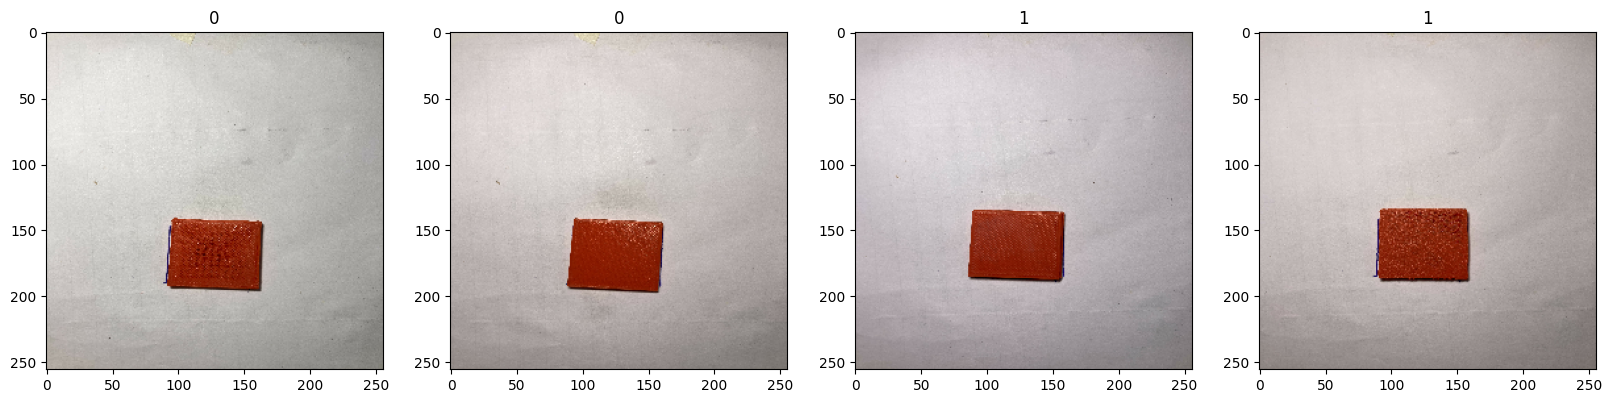

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.6377604 , 0.6228094 , 0.60479474],
          [0.6374081 , 0.61780024, 0.60603553],
          [0.6333027 , 0.61369485, 0.60193014],
          ...,
          [0.53186274, 0.52794117, 0.5122549 ],
          [0.524954  , 0.52103245, 0.5053462 ],
          [0.50834864, 0.5044271 , 0.4887408 ]],
 
         [[0.62875307, 0.6138021 , 0.5957874 ],
          [0.6355086 , 0.61590075, 0.60413605],
          [0.6356771 , 0.61606926, 0.60430455],
          ...,
          [0.52129287, 0.5173713 , 0.501685  ],
          [0.5240962 , 0.5201746 , 0.50448835],
          [0.53304225, 0.5291207 , 0.5134344 ]],
 
         [[0.61435354, 0.59940255, 0.5813879 ],
          [0.634329  , 0.6147212 , 0.6029565 ],
          [0.64646137, 0.6268535 , 0.6150888 ],
          ...,
          [0.50684744, 0.5029259 , 0.48723957],
          [0.51524204, 0.5113205 , 0.4956342 ],
          [0.5155331 , 0.5116115 , 0.49592525]],
 
         ...,
 
         [[0.32708332, 0.31139705, 0.29963234],
          [0.33676

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

11

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 10

In [ ]:
encoder_input = tf.keras.layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
encoder_output = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoder_input)
encoder_output = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(encoder_output)
encoder_output = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_output)
encoder_output = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(encoder_output)
encoder_output = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoder_output)
encoder_output = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(encoder_output)

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
decoder_input = tf.keras.layers.Input(shape=(16, 16, 16))
decoder_output = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(decoder_input)
decoder_output = tf.keras.layers.UpSampling2D((2, 2))(decoder_output)
decoder_output = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(decoder_output)
decoder_output = tf.keras.layers.UpSampling2D((2, 2))(decoder_output)
decoder_output = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(decoder_output)
decoder_output = tf.keras.layers.UpSampling2D((2, 2))(decoder_output)
decoder_output = tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoder_output)


In [ ]:
decoder = tf.keras.models.Model(decoder_input, decoder_output)

In [ ]:
autoencoder = tf.keras.models.Model(encoder_input, decoder(encoder_output))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 16)      

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
11/11 [==============================] - 138s 10s/step - loss: 0.9977 - accuracy: 0.4943 - val_loss: 0.6412 - val_accuracy: 0.5625
Epoch 2/20
11/11 [==============================] - 159s 13s/step - loss: 0.5882 - accuracy: 0.6733 - val_loss: 0.4325 - val_accuracy: 0.9271
Epoch 3/20
11/11 [==============================] - 158s 13s/step - loss: 0.2640 - accuracy: 0.9688 - val_loss: 0.1603 - val_accuracy: 0.9583
Epoch 4/20
11/11 [==============================] - 165s 13s/step - loss: 0.1858 - accuracy: 0.9403 - val_loss: 0.1348 - val_accuracy: 0.9688
Epoch 5/20
11/11 [==============================] - 159s 13s/step - loss: 0.1325 - accuracy: 0.9688 - val_loss: 0.1790 - val_accuracy: 0.9792
Epoch 6/20
11/11 [==============================] - 133s 10s/step - loss: 0.1700 - accuracy: 0.9574 - val_loss: 0.0963 - val_accuracy: 0.9792
Epoch 7/20
11/11 [==============================] - 158s 12s/step - loss: 0.1172 - accuracy: 0.9744 - val_loss: 0.0844 - val_accuracy: 0.9688
Epoch 

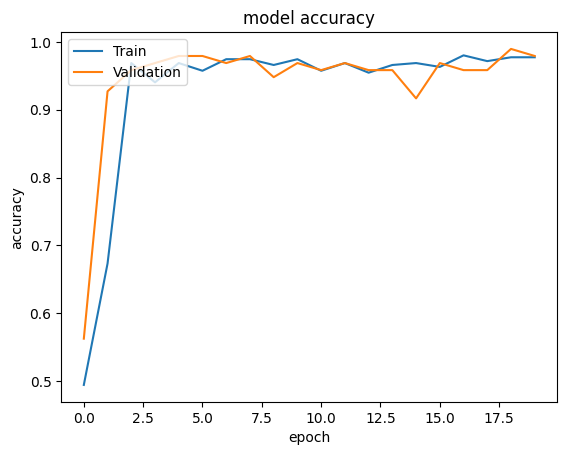

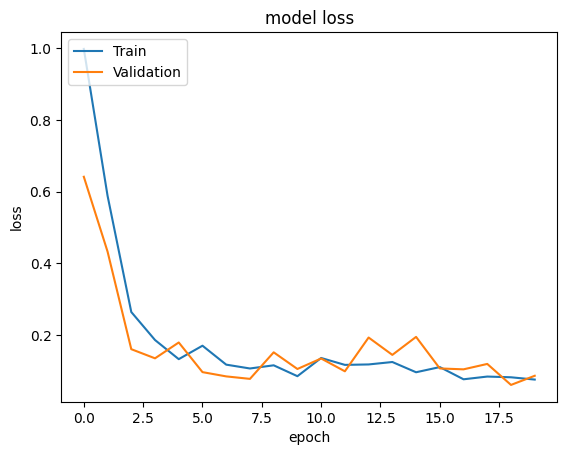

In [ ]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
print(hist.history['accuracy'])

[0.4943181872367859, 0.6732954382896423, 0.96875, 0.9403409361839294, 0.96875, 0.9573863744735718, 0.9744318127632141, 0.9744318127632141, 0.9659090638160706, 0.9744318127632141, 0.9573863744735718, 0.96875, 0.9545454382896423, 0.9659090638160706, 0.96875, 0.9630681872367859, 0.9801136255264282, 0.9715909361839294, 0.9772727489471436, 0.9772727489471436]


In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 743ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [ ]:
# for filename in os.listdir('/content/drive/MyDrive/Final Dataset Pictures/JPEG images/Test/Part B'):
#     # check if the file is an image
#     if filename.endswith('.jpeg'):
#       # read the image using OpenCV
#       img = cv2.imread(os.path.join('/content/drive/MyDrive/Final Dataset Pictures/JPEG images/Test/Part B', filename))
#       # display the image, or do whatever you want with it
#       cv2.imshow('image', img)
#       cv2.waitKey(0)
#       cv2.destroyAllWindows()

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Final Dataset Pictures/JPEG images/Test/Part B/IMG_4907.jpg')

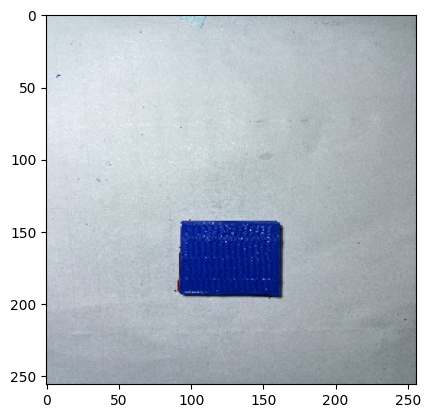

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 39ms/step


In [ ]:
yhat

array([[0.37488005]], dtype=float32)

In [ ]:
if yhat > 0.5: 
    print(f'Defect')
else:
    print(f'Non-Defect')

Non-Defect
